In [54]:
import pandas as pd
import quandl
import datetime
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [55]:
# Load the Excel file
excel_file_path = '/Users/kevinwang/Desktop/stocks/Apple Inc.(AAPL)..xlsx'
data = pd.read_excel(excel_file_path)
data = data.loc[::-1]

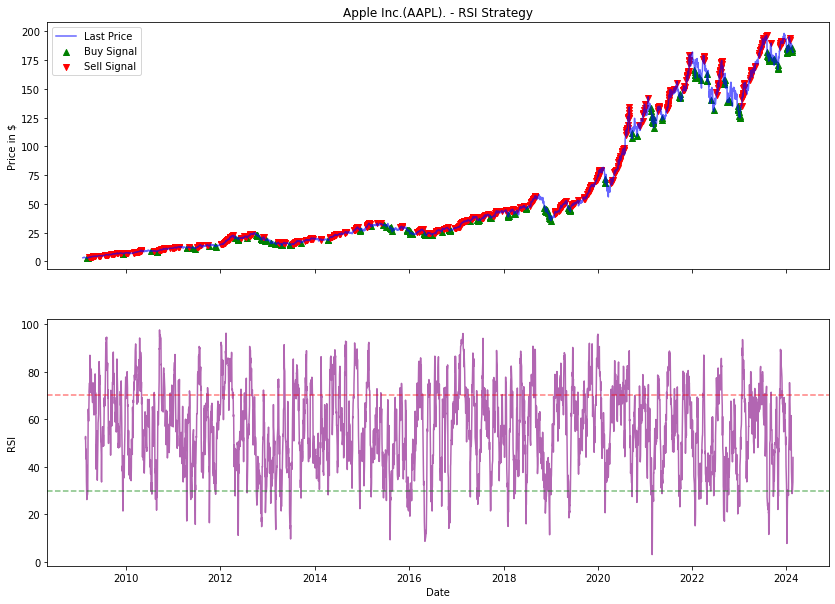

In [56]:
# Calculate the daily returns
data['Daily Return'] = data['Last Price'].pct_change()

# Calculate the gains and losses
data['Gain'] = np.where(data['Daily Return'] > 0, data['Daily Return'], 0)
data['Loss'] = np.where(data['Daily Return'] < 0, -data['Daily Return'], 0)

# Calculate the average gain and loss
window = 14
data['Avg Gain'] = data['Gain'].rolling(window=window).mean()
data['Avg Loss'] = data['Loss'].rolling(window=window).mean()

# Calculate the RS and RSI
data['RS'] = data['Avg Gain'] / data['Avg Loss']
data['RSI'] = 100 - (100 / (1 + data['RS']))

# Identify entry (buy) and exit (sell) points
data['Buy Signal'] = np.where(data['RSI'] < 30, data['Last Price'], np.nan)
data['Sell Signal'] = np.where(data['RSI'] > 70, data['Last Price'], np.nan)

# Plotting the stock price and RSI with buy and sell signals
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Price plot
axs[0].plot(data['Date'], data['Last Price'], label='Last Price', color='blue', alpha=0.6)
axs[0].scatter(data['Date'], data['Buy Signal'], label='Buy Signal', color='green', marker='^', alpha=1)
axs[0].scatter(data['Date'], data['Sell Signal'], label='Sell Signal', color='red', marker='v', alpha=1)
axs[0].set_title('Apple Inc.(AAPL). - RSI Strategy')
axs[0].set_ylabel('Price in $')
axs[0].legend()

# RSI plot
axs[1].plot(data['Date'], data['RSI'], label='RSI', color='purple', alpha=0.6)
axs[1].axhline(70, linestyle='--', alpha=0.5, color='red')
axs[1].axhline(30, linestyle='--', alpha=0.5, color='green')
axs[1].set_ylabel('RSI')
axs[1].set_xlabel('Date')
plt.savefig('/Users/kevinwang/Desktop/output graph/Apple_RSI_Strategy.png')
plt.show()


In [57]:
data['signal'] = np.where(data['Buy Signal'] >= 1, 1, 0)

In [58]:
# Calculate daily returns
data['daily_return'] = data['Last Price'].pct_change()

data['strategy_return'] = data['daily_return'] * data['signal'].shift()

# Cumulative returns
data['cumulative_strategy_return'] = (1 + data['strategy_return']).cumprod()
data['cumulative_market_return'] = (1 + data['daily_return']).cumprod()

# Sharpe Ratio (annualized)
risk_free_rate = 0.0
days_in_year = 252
sharpe_ratio = (data['strategy_return'].mean() / data['strategy_return'].std()) * np.sqrt(days_in_year)

# Max Drawdown
rolling_max = data['cumulative_strategy_return'].cummax()
daily_drawdown = data['cumulative_strategy_return']/rolling_max - 1.0
max_drawdown = daily_drawdown.min()

# Average Win and Loss
average_win = data[data['strategy_return'] > 0]['strategy_return'].mean()
average_loss = data[data['strategy_return'] < 0]['strategy_return'].mean()

# Buy and Hold Return
buy_and_hold_return = (data['Last Price'].iloc[-1] - data['Last Price'].iloc[0])/data['Last Price'].iloc[0]
# Strategy Return
strategy_return = data['cumulative_strategy_return'].iloc[-1] - 1

{
    "sharpe_ratio": round(sharpe_ratio, 2),
    "cumulative_strategy_return": round(strategy_return,2),
    "max_drawdown": round(max_drawdown,2),
    "average_win": round(average_win,2),
    "average_loss": round(average_loss,2),
    "buy_and_hold": round(buy_and_hold_return,2)
}

{'sharpe_ratio': 0.53,
 'cumulative_strategy_return': 1.06,
 'max_drawdown': -0.19,
 'average_win': 0.02,
 'average_loss': -0.01,
 'buy_and_hold': 55.64}